<a href="https://colab.research.google.com/github/dhahbimohamed/ml-zero-to-expert/blob/main/10_iris_decision_tree(deep).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 **✅understanding: 8 / 10**


### **1. What’s the difference between Gini Impurity and Entropy?**

- **Gini Impurity** is used in the CART algorithm.
- **Entropy** is used in the ID3 algorithm.
- Both measure how "pure" a node is, but Gini is faster to compute.






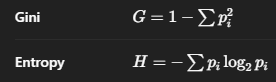

### **2. Why do deeper trees tend to overfit?**

- A deeper tree sees more splits, allowing it to memorize training data.
- This leads to poor generalization on unseen data — classic overfitting.

### **3. What is `max_depth` in a Decision Tree?**

- It’s a **hyperparameter** that limits how deep the tree can grow.
- Smaller values prevent overfitting by simplifying the tree.

### **4. If you don’t limit the depth, what could happen?**

- The tree may **memorize the training data**, fitting noise and outliers.
- This results in **perfect training accuracy** but poor test performance.

# 🌲 Hyperparameters of Decision Tree (sklearn)

To control the complexity and performance of a decision tree, several hyperparameters can be tuned:

---

### 🔸 `max_depth`  
- The **maximum depth** the tree is allowed to grow.
- Prevents overfitting by limiting how detailed the tree can become.

> Example: `DecisionTreeClassifier(max_depth=3)`

---

### 🔸 `min_samples_split`  
- The **minimum number of samples** required to split an internal node.
- Higher values make the tree more conservative (less complex).

> Default is 2.  
> Example: `min_samples_split=10` → splits only if a node has 10+ samples.

---

### 🔸 `min_samples_leaf`  
- The **minimum number of samples** that a leaf node must have.
- Forces the tree to keep leaf nodes with enough data.

> Prevents overfitting small, noisy branches.  
> Example: `min_samples_leaf=5`

---

### 🔸 `max_features`  
- The **number of features** to consider when looking for the best split.
- Can be `'sqrt'`, `'log2'`, a float (fraction), or an integer.

> Often used in Random Forests to add randomness.

---

### 🔸 `criterion`  
- The function used to measure the quality of a split.
- Options: `'gini'` (default) or `'entropy'`

> Gini is faster, entropy is more information-theoretic.

---

### 🔸 `random_state`  
- Controls randomness of the splits — useful for **reproducibility**.
- Always set this when testing models: `random_state=42`.




# **Code**


In [29]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [30]:
iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [31]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
print("Accurancy",clf.score(X_train,y_train))

Accurancy 1.0


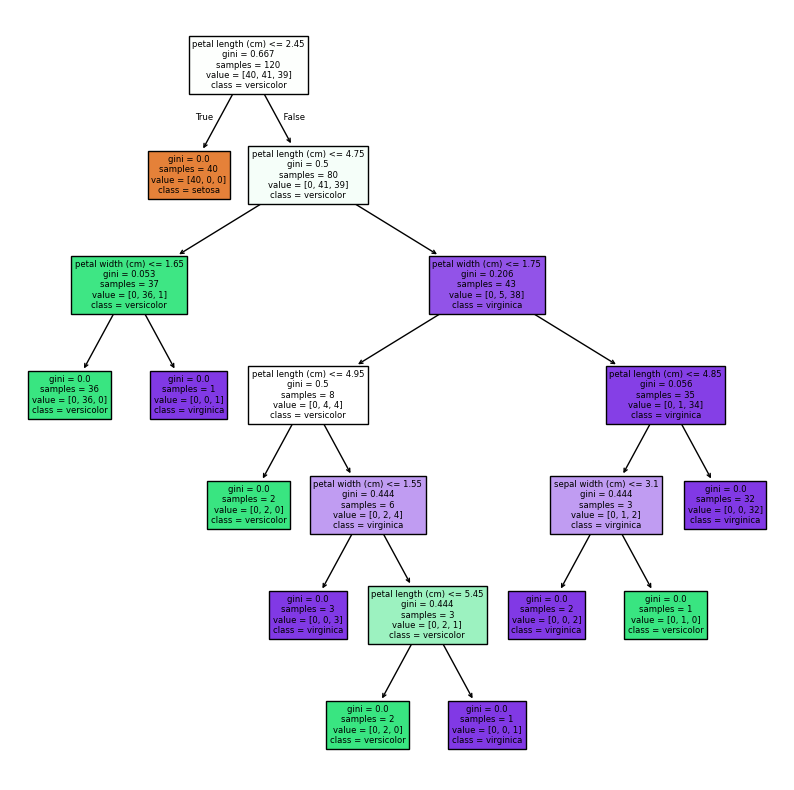

In [33]:
plt.figure(figsize=(10,10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

## Hyperparameter Tuning with GridSearchCV

To get the best performance from our model, we used GridSearchCV to search through different combinations of decision tree hyperparameters.

GridSearch tried combinations of:
- `max_depth`
- `min_samples_split`
- `min_samples_leaf`
- `criterion`

It used 5-fold cross-validation to find the best configuration.

Then we tested the best model on our test set to get the real-world performance.


In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

param_grid = {
    'max_depth': [2, 3, 4, 5, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid,
                           cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)



Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9583333333333334
